In [586]:
# Load libraries/data/explore the shape of the dataset
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

index = ['id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

glass=pd.read_csv("C:/Users/Chris R/glass.data", names=index)
glass.shape

(214, 11)

In [489]:
glass.head(3)

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [490]:
glass.dtypes

id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [491]:
# Descriptive statistics
glass1=glass.drop(['id'],axis=1)
glass1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


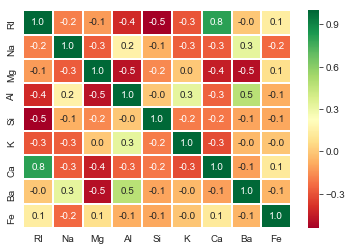

In [345]:
# Correlation matrix
glass2=glass1.drop(['Type'],axis=1)
sb.heatmap(glass2.corr(), cmap='RdYlGn', annot=True, fmt=".1f", linewidths=1);

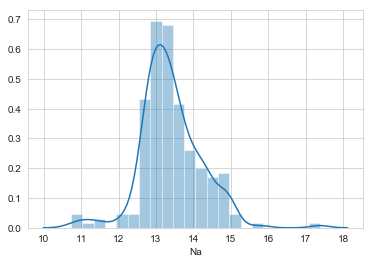

In [346]:
# Univariate Analysis and Visualizations
sb.distplot(glass2.Na);

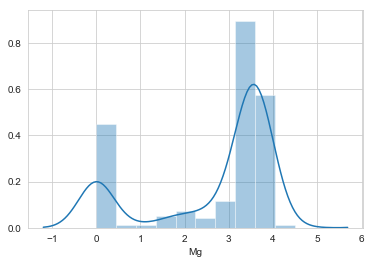

In [237]:
sb.distplot(glass2.Mg);

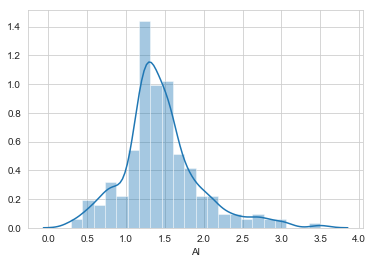

In [224]:
sb.distplot(glass2.Al);

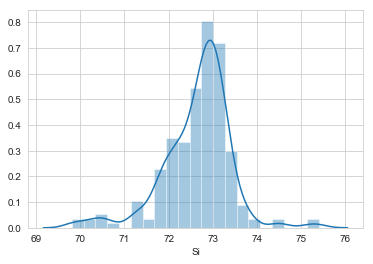

In [225]:
sb.distplot(glass2.Si);

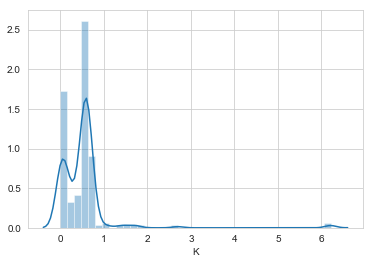

In [227]:
sb.distplot(glass2.K);

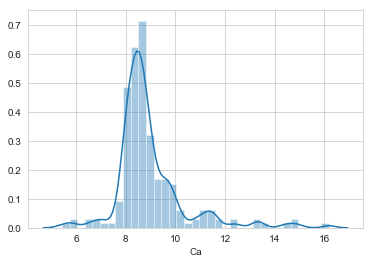

In [229]:
sb.distplot(glass2.Ca);

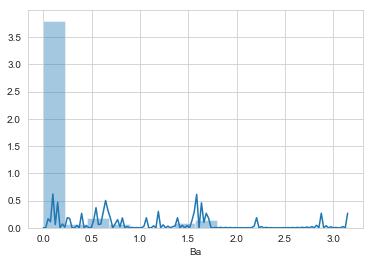

In [232]:
sb.distplot(glass2.Ba);

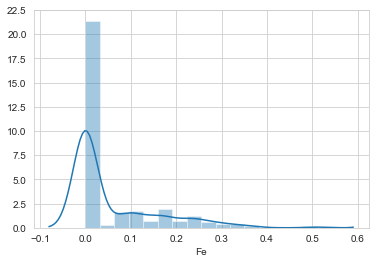

In [238]:
sb.distplot(glass2.Fe);

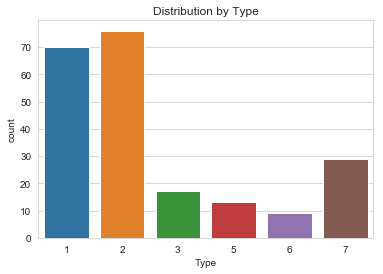

In [240]:
sb.countplot(glass['Type'])
plt.title('Distribution by Type');

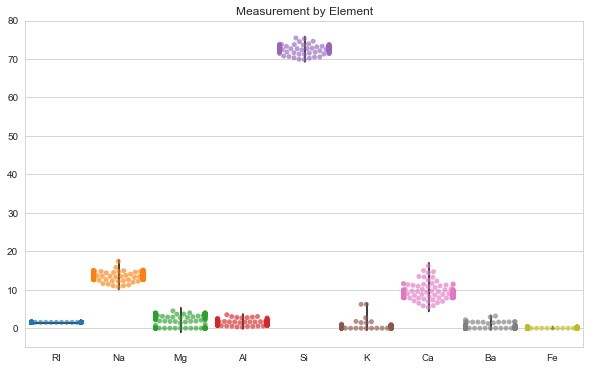

In [235]:
plt.figure(figsize=(10,6))
sb.set_style('whitegrid')
sb.violinplot(data=glass2, inner=None)
sb.swarmplot(data=glass2, alpha=0.65)
plt.title('Measurement by Element');

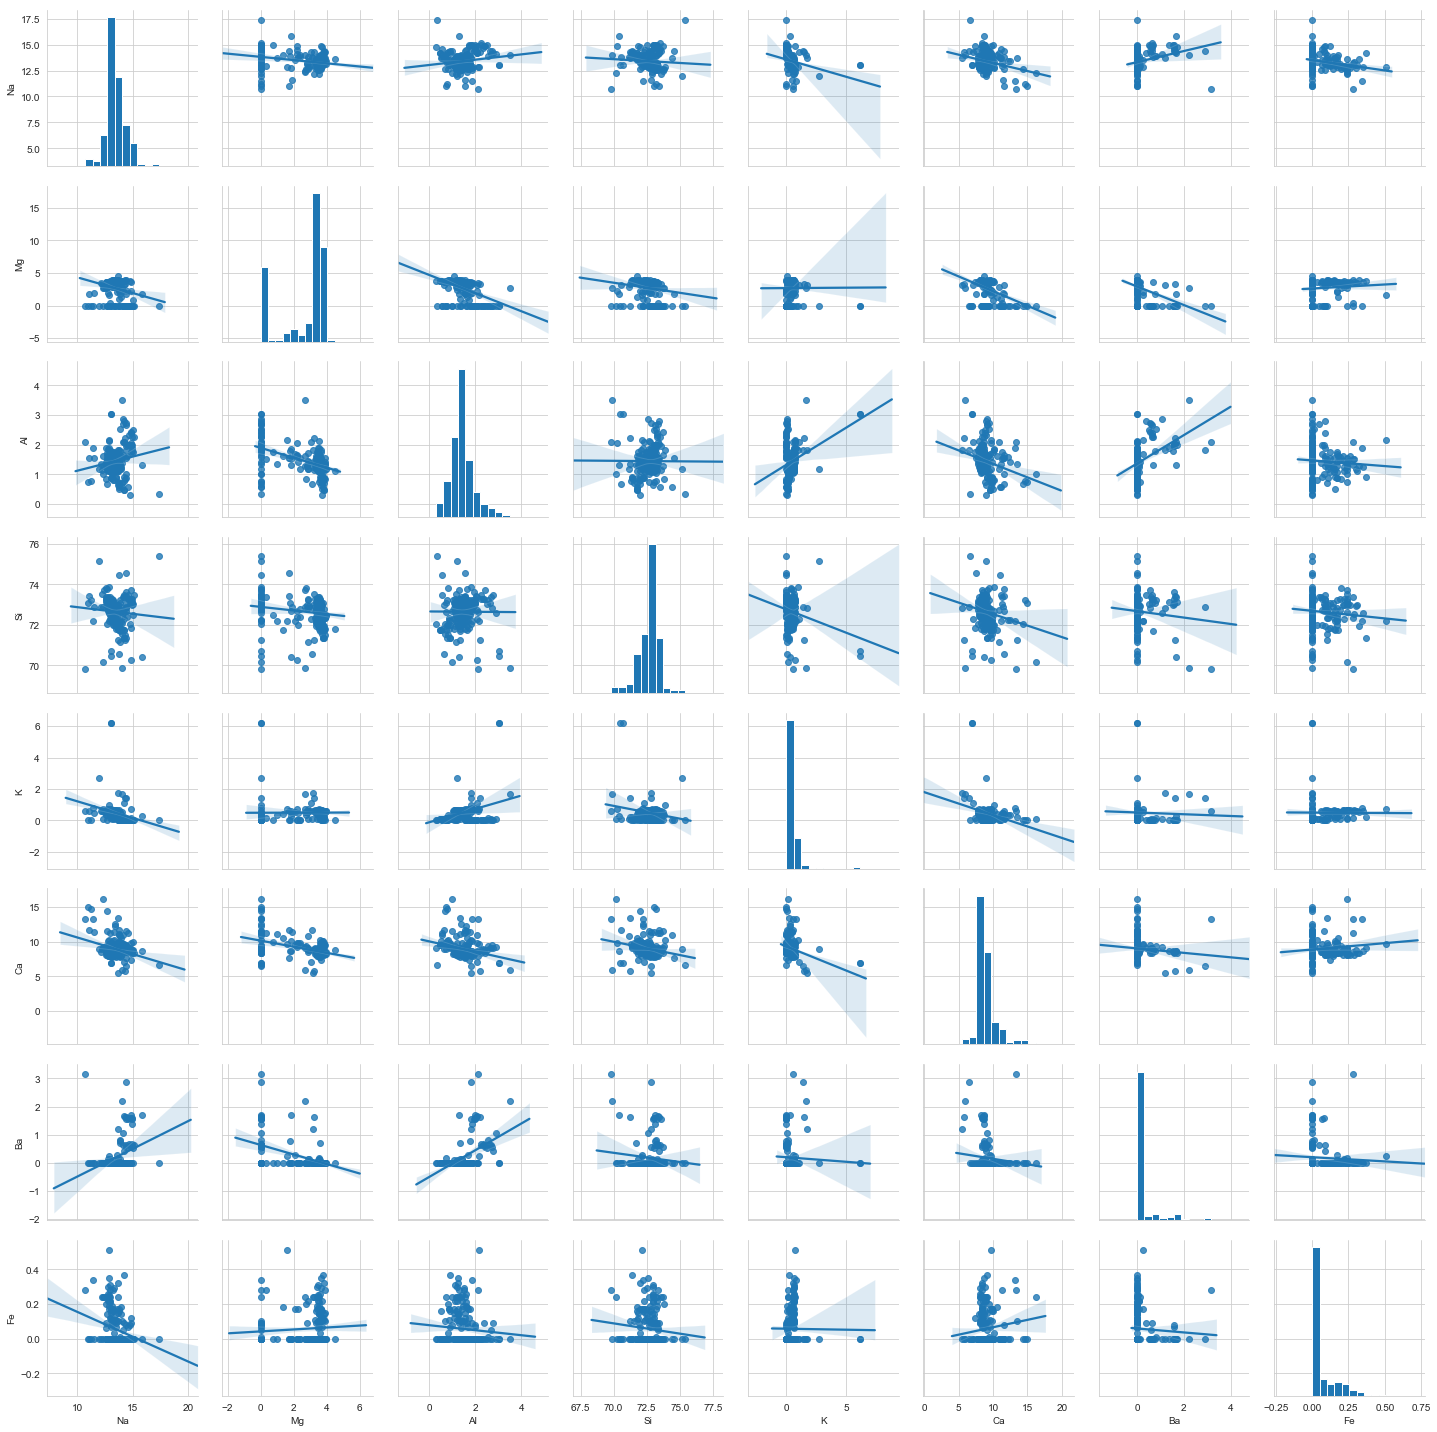

In [236]:
# Bivariate Analysis and Visualizations
sb.pairplot(data=glass[['Na','Mg','Al','Si','K','Ca','Ba','Fe']],kind='reg',dropna=True);

In [376]:
# Do you need to clean the data?
glass.isnull().values.any()

False

(171, 9) (171,)
(43, 9) (43,)


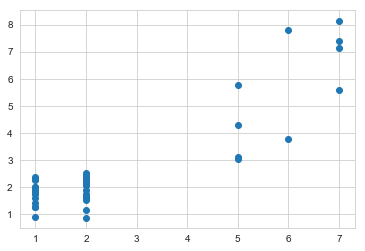

In [590]:
# Baseline model: train a KNN classifier to serve as the baseline.
elements = list(glass1.columns.values)
elements.remove('Type')

X= glass1[elements]
y= glass1['Type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 99)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

linearmodel= linear_model.LinearRegression()
linearmodel.fit(X_train, y_train)

predictions = linear.predict(X_test)
plt.scatter(y_test, predictions);

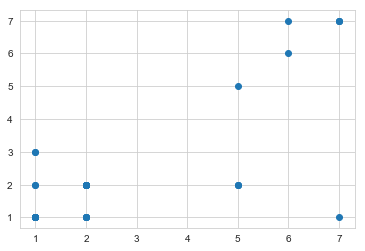

In [538]:
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)

predictions = KNNmodel.predict(X_test) 
plt.scatter(y_test, predictions);

The optimal number of neighbors is 1


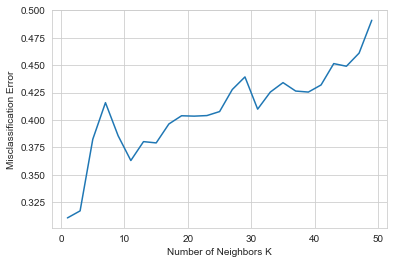

In [539]:
# Parameter tuning with cross validation:
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

# perform 7-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show();

The optimal number of neighbors is 3


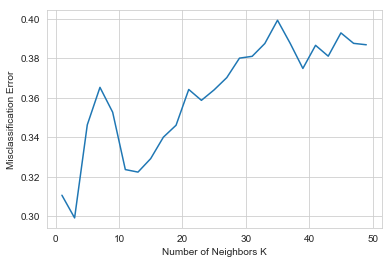

In [540]:
#Apply Diagnostics - Implement Weighed Voting using weights='distance'
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

# perform 7-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show();

The optimal number of neighbors is 1


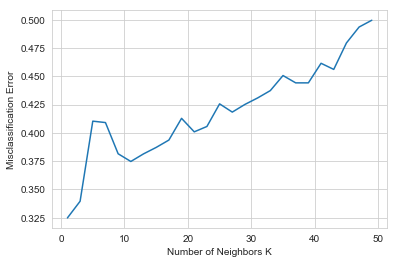

In [506]:
#Applying Diagnostics - Minkowski Distance 
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

# perform 7-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show();

The optimal number of neighbors is 1


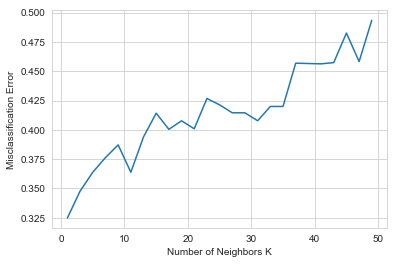

In [508]:
#Applying Diagnostics - Manhattan Distance 
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

# perform 7-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', p=1)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show();

# Do they improve your model? No

(171, 9) (171,)
(43, 9) (43,)


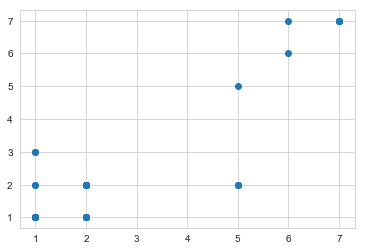

In [564]:
#Apply Diagnostics - Convert the data using normalize()
elements1 = list(glass1.columns.values)
elements1.remove('Type')

X= glass1[elements1]
normX=normalize(X)
normy=glass1['Type']

X_train, X_test, y_train, y_test = train_test_split(normX,normy,test_size=0.20,random_state = 99)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)

predictions = KNNmodel.predict(X_test) 
plt.scatter(y_test, predictions);

The optimal number of neighbors is 1


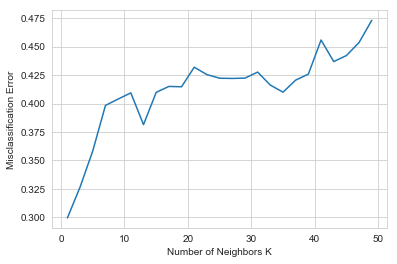

In [569]:
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

# perform 7-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show();

#In general when using KNN, it is best to normalize to a range between 0-1 to improve performance

[4.76205247e-01 2.63192760e-01 1.07800432e-01 1.02024637e-01
 3.30672372e-02 1.60477360e-02 1.42743130e-03 2.34365001e-04
 1.53917702e-07]
[2.52869126e+01 1.87990408e+01 1.20312007e+01 1.17044564e+01
 6.66342748e+00 4.64200502e+00 1.38444698e+00 5.60977056e-01
 1.43761635e-02]


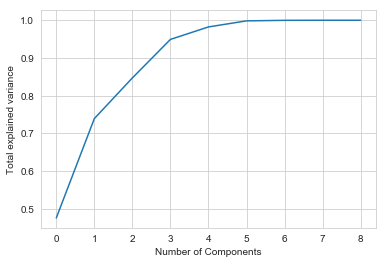

In [583]:
# Use Dimensionality reduction techniques like PCA:
X = glass1[elements]
pca = PCA(n_components=9)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total explained variance')
plt.show();

In [601]:
# What is the final confusion matric that you can share? 
elements1 = list(glass1.columns.values)
elements1.remove('Type')

X= glass1[elements1]
normX=normalize(X)
normy=glass1['Type']

X_train, X_test, y_train, y_test = train_test_split(normX,normy,test_size=0.20,random_state = 99)

KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)

predictions = KNNmodel.predict(X_test) 
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[12  2  2  0  0  0]
 [ 6 11  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  4]]


In [621]:
# What is overall accuracy of the model?
accuracy= accuracy_score (y_test, predictions)
print(accuracy*100)

67.44186046511628
